Problem Set 3

Question 1

Step 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd

Step 2. Import the dataset from this address. 
Step 3. Assign it to a variable called users

In [2]:
users = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|')

Step 4. Discover what is the mean age per occupation

In [3]:
users[["age", "occupation"]].groupby("occupation").mean()

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


Step 5. Discover the Male ratio per occupation and sort it from the most to the least 

In [4]:
def numeric_gender(a):
    if a == 'M':
        return 1
    if a == 'F':
        return 0
    
users['gender_num'] = users['gender'].apply(numeric_gender)

ratio = users.groupby('occupation').gender_num.sum()/users.occupation.value_counts() * 100

ratio.sort_values(ascending = False)

doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
dtype: float64

Step 6. For each occupation, calculate the minimum and maximum ages

In [5]:
users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


Step 7. For each combination of occupation and sex, calculate the mean age

In [6]:
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

Step 8. For each occupation present the percentage of women and men

In [7]:
gender_occupation = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
occup_count = users.groupby(['occupation']).agg('count')
gender_occup_percent = gender_occupation.div(occup_count, level = "occupation") * 100
gender_occup_percent.loc[: , 'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

Question 2

Step 1. Import the necessary libraries

In [8]:
import numpy as np
import pandas as pd

Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12

In [10]:
euro12 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')

In [11]:
euro12.head(10)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


Step 4. Select only the Goal column

In [12]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

Step 5. How many team participated in the Euro2012? 

In [13]:
no_of_teams = euro12['Team'].count()
print(no_of_teams, "teams participated in the Euro2012 competition")

16 teams participated in the Euro2012 competition


Step 6. What is the number of columns in the dataset?

In [17]:
columns = len(euro12.axes[1])
print("There are", columns, "columns in the dataset.")

There are 35 columns in the dataset.


Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them 
to a dataframe called discipline

In [19]:
cards = pd.DataFrame(euro12, columns = ['Team', 'Red Cards', 'Yellow Cards'])
cards

,Team,Red Cards,Yellow Cards
0,Croatia,0,9
1,Czech Republic,0,7
2,Denmark,0,4
3,England,0,5
4,France,0,6
5,Germany,0,4
6,Greece,1,9
7,Italy,0,16
8,Netherlands,0,5
9,Poland,1,7


Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [20]:
cards.sort_values(by=['Red Cards', 'Yellow Cards'])
cards

,Team,Red Cards,Yellow Cards
0,Croatia,0,9
1,Czech Republic,0,7
2,Denmark,0,4
3,England,0,5
4,France,0,6
5,Germany,0,4
6,Greece,1,9
7,Italy,0,16
8,Netherlands,0,5
9,Poland,1,7


Step 9. Calculate the mean Yellow Cards given per Team

In [21]:
mean_yellow = cards['Yellow Cards'].mean()
print("The Mean Yellow Cards per Team is:", mean_yellow)

The Mean Yellow Cards per Team is: 7.4375


Step 10. Filter teams that scored more than 6 goals

In [23]:
plus6_goals = euro12['Goals'] > 6
euro12[plus6_goals]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


Step 11. Select the teams that start 
with G

In [24]:
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


Step 12. Select the first 7 columns

In [25]:
euro12.head(7)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


Step 13. Select all columns except the last 3

In [26]:
euro12.loc[:, ~euro12.columns.isin(['Subs on', 'Subs off', 'Players Used'])]  

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [27]:
euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


Question 3

Step 1. Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import random

Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000 

In [3]:
# series 1 
# random number from 1-4
series_1 = [[random.randint(1, 4)] for i in range(100)]
df_1 = pd.DataFrame(series_1)
df_1

,0
0,1
1,1
2,2
3,3
4,4
...,...
95,4
96,2
97,2
98,2


In [4]:
# series 2
# random number from 1 to 3
series_2 = [[random.randint(1, 3)] for i in range(100)]
df_2 = pd.DataFrame(series_2)
df_2

,0
0,2
1,1
2,1
3,1
4,2
...,...
95,1
96,2
97,3
98,3


In [5]:
# series 3
# random number from 10,000 to 30,000
series_3 = [[random.randint(10000, 30000)] for i in range(100)]
df_3 = pd.DataFrame(series_3)
df_3

,0
0,27055
1,27423
2,17938
3,20865
4,21844
...,...
95,23126
96,27122
97,22374
98,19052


Step 3. Create a DataFrame by joinning the Series by column

In [6]:
df = pd.concat([df_1, df_2, df_3], axis=1)
df

,0,0,0
0,1,2,27055
1,1,1,27423
2,2,1,17938
3,3,1,20865
4,4,2,21844
...,...,...,...
95,4,1,23126
96,2,2,27122
97,2,3,22374
98,2,3,19052


Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [7]:
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
df

,bedrs,bathrs,price_sqr_meter
0,1,2,27055
1,1,1,27423
2,2,1,17938
3,3,1,20865
4,4,2,21844
...,...,...,...
95,4,1,23126
96,2,2,27122
97,2,3,22374
98,2,3,19052


Step 5. Create a one column DataFrame with the values of the 3 Series and assign it 
to 'bigcolumn'

In [8]:
df_new = df.bedrs.astype(str).str.cat(df.bathrs.astype(str)).str.cat(df.price_sqr_meter.astype(str))
df_new.columns = ['bigcolumn']
df_new

0     1227055
1     1127423
2     2117938
3     3120865
4     4221844
       ...   
95    4123126
96    2227122
97    2322374
98    2319052
99    4323644
Name: bedrs, Length: 100, dtype: object

Step 6. Ops it seems it is going only until index 99. Is it true? 

In [9]:
True

True

Step 7. Reindex the DataFrame so it goes from 0 to 299


In [10]:
df_new.reset_index()
df_new.reindex(index=range(0,299))

0      1227055
1      1127423
2      2117938
3      3120865
4      4221844
        ...   
294        NaN
295        NaN
296        NaN
297        NaN
298        NaN
Name: bedrs, Length: 299, dtype: object

Question 4

Step 1. Import the necessary libraries

In [18]:
import pandas as pd
import datetime as dt

Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper 
datetime index

In [19]:
data = pd.read_csv("wind.txt")
data = pd.read_csv("wind.txt", sep = "\s+", parse_dates = {'Date':[0,1,2]})
data.head()

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


Step 4. Year 2061? Do we really have data from this year? Create a function to fix it 
and apply it.

In [21]:
import datetime as dt

def right_year(x):
    if x.year > 2021:
        year = x.year - 100
    else:
        year = x.year
    return dt.date(year,x.month,x.day)
data['Date']=data['Date'].apply(lambda x: right_year(x))
data

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


Step 5. Set the right dates as the index. Pay attention at the data type, it should be 
datetime64[ns].


In [22]:
data['Date'] = data['Date'].astype('datetime64[ns]')
data = data.set_index('Date')

Step 6. Compute how many values are missing for each location over the entire 
record.They should be ignored in all calculations below.

In [23]:
print(data.isnull().sum())

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


Step 7. Compute how many non-missing values there are in total.

In [24]:
(data.notnull().sum())
print(data.notnull().sum().sum())


78857


Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and 
all the times.


In [25]:
print(data.mean().mean())

10.227982360836924


Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean 
windspeeds and standard deviations of the windspeeds at each location over all the 
days. A different set of numbers for each location.

In [26]:
loc_stats = data.agg(["count", "min", "max", "mean", "std"])
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


Step 10. Create a DataFrame called day_stats and calculate the min, max and mean 
windspeed and standard deviations of the windspeeds across all the locations at each 
day.
A different set of numbers for each day.

In [27]:
day_stats=pd.DataFrame()
day_stats['min']=data.min(axis=1)
day_stats['max']=data.max(axis=1)
day_stats['mean']=data.mean(axis=1)
day_stats['std']=data.std(axis=1)
day_stats.head()

,min,max,mean,std
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


Step 11. Find the average windspeed in January for each location. 
Treat January 1961 and January 1962 both as January.


In [28]:
avg_windspees=data[data.index.month==1]
avg_windspees.mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

Step 12. Downsample the record to a yearly frequency for each location.

In [29]:
yearly_freq = data.resample(rule = "Y")
print(yearly_freq.mean())

                  RPT        VAL        ROS       KIL        SHA       BIR  \
Date                                                                         
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.088329  5.241507   9.440329

yearly_freq = data.resample(rule = "Y")
print(yearly_freq.mean())

Step 13. Downsample the record to a monthly frequency for each location.

In [30]:
Monthly_freq = data.resample(rule = "M")
print(Monthly_freq.mean())

                  RPT        VAL        ROS       KIL        SHA        BIR  \
Date                                                                          
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-31  16.175484  13.748065  15.635161  7.09483

Step 14. Downsample the record to a weekly frequency for each location

In [31]:
weekly_freq = data.resample(rule = "W")
print(weekly_freq.mean())

                  RPT        VAL        ROS        KIL        SHA        BIR  \
Date                                                                           
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14.951429  11.801429  16.035

Step 15. Calculate the min, max and mean windspeeds and standard deviations of the 
windspeeds across all locations for each week (assume that the first week starts on B
January 2 1961) for the first 52 weeks.

In [32]:
weekly = data.resample(rule = "W").agg(['min', 'max', 'std'])
print(weekly.head())

              RPT                     VAL                     ROS         \
              min    max       std    min    max       std    min    max   
Date                                                                       
1961-01-01  15.04  15.04       NaN  14.96  14.96       NaN  13.17  13.17   
1961-01-08  10.58  18.50  2.631321   6.63  16.88  3.949525   7.62  12.33   
1961-01-15   9.04  19.75  3.555392   3.54  12.08  3.148945   7.08  19.50   
1961-01-22   4.92  19.83  5.337402   3.42  14.37  3.837785   7.29  20.79   
1961-01-29  13.62  25.04  4.619061   9.96  23.91  5.170224  12.67  25.84   

                       KIL  ...       MUL    CLO                     BEL  \
                 std   min  ...       std    min    max       std    min   
Date                        ...                                            
1961-01-01       NaN  9.29  ...       NaN  12.58  12.58       NaN  18.50   
1961-01-08  1.604761  4.58  ...  1.722255   5.88  10.46  1.704941   5.46   
1961-01-15 

Question 5

Step 1. Import the necessary libraries

In [33]:
import numpy as np
import pandas as pd

Step 2. Import the dataset from this address. 
Step 3. Assign it to a variable called chipo. 

In [34]:
chipo = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep="\t")


Step 4. See the first 10 entries

In [35]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Step 5. What is the number of observations in the dataset?

In [36]:
chipo.shape[0]

4622

Step 6. What is the number of columns in the dataset?

In [37]:
len(chipo.axes[1])

5

Step 7. Print the name of all the columns.

In [38]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

Step 8. How is the dataset indexed?

In [39]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

Step 9. Which was the most-ordered item?

In [40]:
chipo.groupby(by="item_name").sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


Step 10. For the most-ordered item, how many items were ordered?

In [41]:
chipo.groupby(by="item_name").sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


Step 11. What was the most ordered item in the choice_description column? 

In [42]:
chipo.groupby(by="choice_description").sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


Step 12. How many items were orderd in total?

In [43]:
chipo.item_name.count()

4622

Step 13.
• Turn the item price into a float

In [44]:
def num_float(x):
    return float(x[1:-1])
chipo.item_price = chipo.item_price.apply(num_float)
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


• Check the item price type


In [45]:
chipo.item_price.dtype

dtype('float64')

Step 14. How much was the revenue for the period in the dataset?

In [46]:
revenue = (chipo.item_price * chipo.quantity).sum()
print('Total Revenue = $', revenue)

Total Revenue = $ 39237.02


Step 15. How many orders were made in the period?

In [47]:
chipo.order_id.value_counts().count()

1834

Step 16. What is the average revenue amount per order?

In [48]:
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped.mean()['revenue']

21.394231188658654

Step 17. How many different items are sold?


In [49]:
chipo.item_name.value_counts().count()

50

Question 6

Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend. 
Don't forget to label your axes!


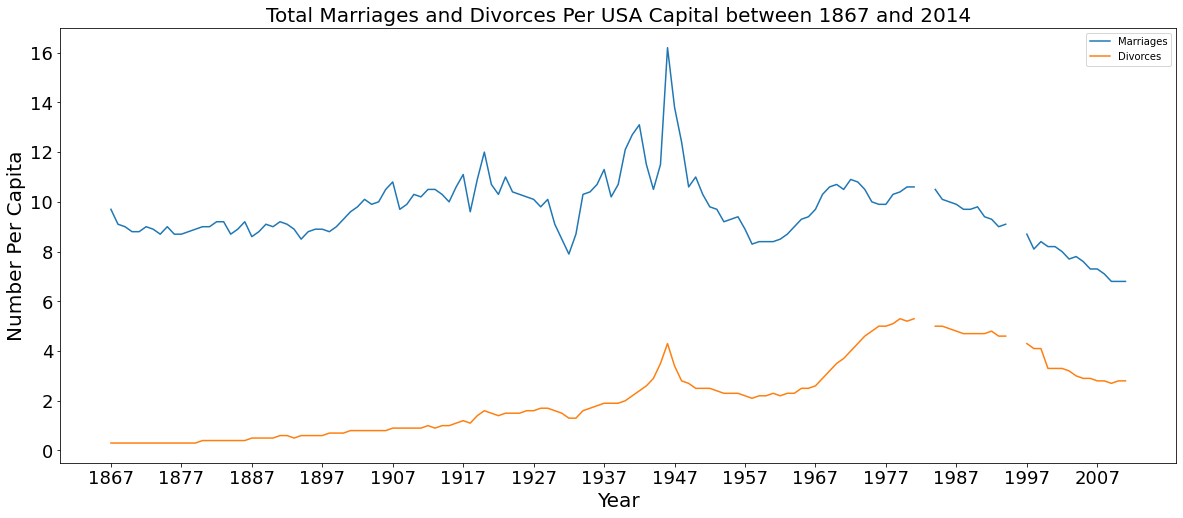

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("us-marriages-divorces-1867-2014.csv")
plt.figure(figsize=(20,8))
plt.plot(df.Year,df.Marriages_per_1000,label="Marriages")
plt.plot(df.Year,df.Divorces_per_1000,label="Divorces")
plt.title('Total Marriages and Divorces Per USA Capital between 1867 and 2014',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Number Per Capita',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend()
plt.xticks(df.Year[::10])
plt.show()

Question 7

Create a vertical bar chart comparing the number of marriages and divorces per 
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

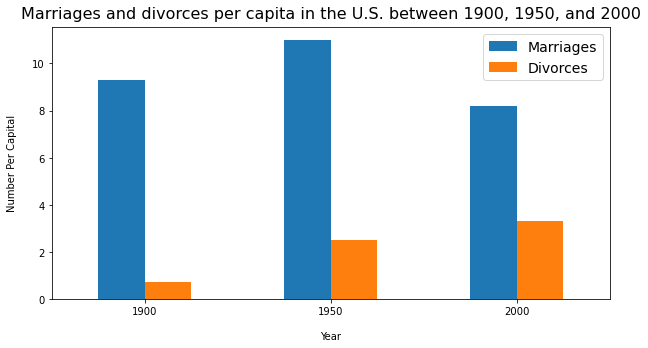

In [52]:
df = df[(df.Year == 1900) | (df.Year == 1950) |(df.Year == 2000)]
df.set_index('Year')[['Marriages_per_1000', 'Divorces_per_1000']].plot(kind='bar', figsize=(10, 5))
plt.xticks(rotation=360)
plt.title("Marriages and divorces per capita in the U.S. between 1900, 1950, and 2000", fontsize=16, y=1.01)
plt.xlabel("Year", labelpad=15)
plt.ylabel("Number Per Capital", labelpad=15)
plt.legend(["Marriages", "Divorces"], fontsize=14)

Question 8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort 
the actors by their kill count and label each bar with the corresponding actor's name. 
Don't forget to label your axes!

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df_actor_kill = pd.read_csv("actor_kill_counts.csv")
df_actor_kill.head()

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239


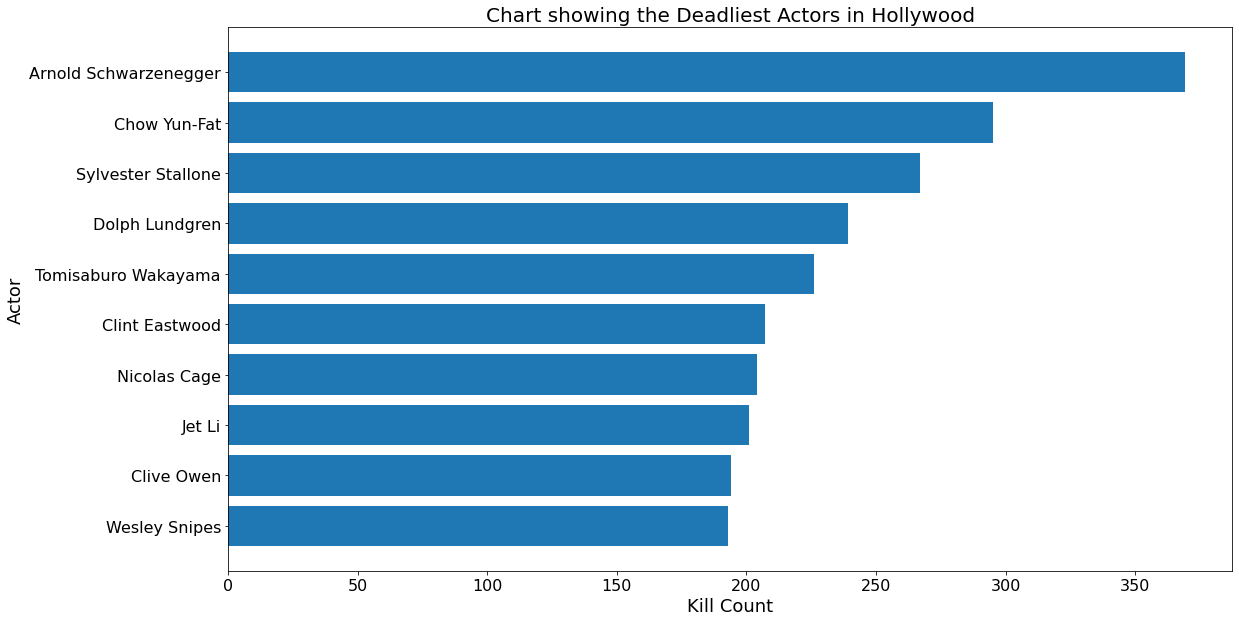

In [14]:
plt.figure(figsize=(18,10))
plt.barh(df_actor_kill.Actor, df_actor_kill.Count, align='center')
df_actor_kill = df_actor_kill.sort_values('Count', ascending = True)
plt.title('Chart showing the Deadliest Actors in Hollywood', fontsize=20)
plt.xlabel('Kill Count', fontsize=18)
plt.ylabel('Actor', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Question 9

Create a pie chart showing the fraction of all Roman Emperors that were 
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the 
percentage breakdown of the categories.


In [ ]:
import pandas as pd
roman_emporer = pd.read_csv("roman-emperor-reigns.csv")
roman_emporer.head()
from plotly.offline import iplot

pie1 = roman_emporer.Cause_of_Death
labels = roman_emporer.Cause_of_Death

fig = {  "data": [   {
      "labels": labels,
      "domain": {"x": [.4, .10]},
      "name": "",
      "hoverinfo":"label+percent+name",
      "hole": 0,
      "type": "pie"
    },],
    
    
  "layout": {
        "title":"Causes of Death of all Roman Emporer",
         
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
                "text":"",
                "x": 0.20,
                "y": 1
            },]}}
iplot(fig)



Question 10

Create a scatter plot showing the relationship between the total revenue earned by 
arcades and the number of Computer Science PhDs awarded in the U.S. between 
2000 and 2009.
Don't forget to label your axes! 
Color each dot according to its year

In [16]:
import pandas as pd
import seaborn as sns

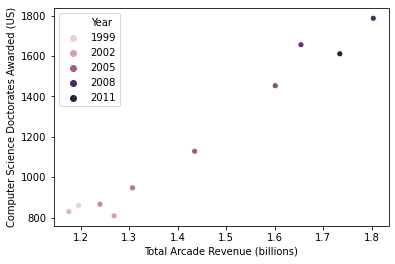

In [17]:
total_revenue = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")
sns.scatterplot(x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', hue='Year', 
                data=total_revenue)